In [62]:
import re
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

In [63]:
def get_words_list(text):
    return [x.lower() for x in re.findall(r'[a-zA-Z0-9_\(\)\|]+', text)]

In [73]:
def get_words_list_from_file(fileName):
    with open(fileName, 'r') as file:
        data = file.read().replace('\n', ' ')

    return get_words_list(data)

In [65]:
def get_unique_words_list(words_list):
    return sorted(list(set(words_list)), key=str.lower)

In [66]:
def create_bipartite_graph(words_list):
    bi_graph = nx.Graph()
    # Add nodes with the node attribute "bipartite". Append 0 and 1 to differentiate between the two sets of nodes.
    unique_words_list = get_unique_words_list(words_list)
    bi_graph.add_nodes_from([word + "_0" for word in unique_words_list], bipartite=0)
    bi_graph.add_nodes_from([word + "_1" for word in unique_words_list], bipartite=1)

    for i in range(len(words_list)):
        if i >= 2:
            # check 2 neighbours before
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i - 2] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i - 2] + "_1", weight=1)
        if i >= 1:
            # check 1 neighbour before
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i - 1] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i - 1] + "_1", weight=1)
        if i < len(words_list) - 1:
            # check 1 neighbour after
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i + 1] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i + 1] + "_1", weight=1)
        if i < len(words_list) - 2:
            # check 2 neighbours after
            if not bi_graph.has_edge(words_list[i] + "_0", words_list[i + 2] + "_1"):
                bi_graph.add_edge(words_list[i] + "_0", words_list[i + 2] + "_1", weight=1)

    return bi_graph

In [74]:
def draw_bipartite_graph(graph):
    X, Y = bipartite.sets(graph)
    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(X))  # put nodes from X at x=1
    pos.update((n, (2, i)) for i, n in enumerate(Y))  # put nodes from Y at x=2
    nx.draw(graph, pos=pos, with_labels=True, node_color=['blue' if node.endswith("_0") else 'green' for node in graph])
    plt.show()

In [68]:
def get_count_of_edges_for_words(graph):
    words = {}
    for node in graph:
        if node.endswith("_0"):
            words[node[:-2]] = 0
            for neighbour in graph[node]:
                words[node[:-2]] += graph[node][neighbour]['weight']
    return dict(sorted(words.items(), key=lambda item: item[1], reverse=True))

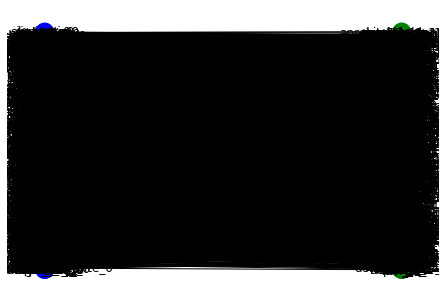

In [76]:
text_words = get_words_list_from_file('../../resources/sample.txt')
words_graph = create_bipartite_graph(text_words)
draw_bipartite_graph(words_graph)

In [70]:
print(get_count_of_edges_for_words(words_graph))

{'kota': 3, 'ala': 2, 'ma': 2}
